<a href="https://colab.research.google.com/github/MohammedShabry/DL-Assignment/blob/shabry/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

# Drop unnecessary columns
df = df.drop(columns=['customerID'])

# Handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values only for numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Convert categorical features into numeric using Label Encoding
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['Partner'] = le.fit_transform(df['Partner'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['PhoneService'] = le.fit_transform(df['PhoneService'])
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])
df['InternetService'] = le.fit_transform(df['InternetService'])
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])
df['TechSupport'] = le.fit_transform(df['TechSupport'])
df['StreamingTV'] = le.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])
df['Contract'] = le.fit_transform(df['Contract'])
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])
df['Churn'] = le.fit_transform(df['Churn'])

# Select input features and target
X = df.drop(columns=['Churn'])
y = df['Churn']

# Normalize the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Reshape data to 3D format for LSTM
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the improved LSTM model
lstm_model = Sequential()

# LSTM layer with dropout
lstm_model.add(LSTM(units=50, activation='tanh', input_shape=(X_train_reshaped.shape[1], 1), return_sequences=False))
lstm_model.add(Dropout(0.3))  # Dropout of 30% to reduce overfitting

# Dense layer with fewer units
lstm_model.add(Dense(units=16, activation='relu'))

# Output layer
lstm_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with a lower learning rate
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to stop training when validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping and a validation split of 30%
lstm_history = lstm_model.fit(
    X_train_reshaped, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.3,  # increased validation split to 30%
    callbacks=[early_stopping]  # use early stopping
)

# Evaluate the model on the test set
lstm_score = lstm_model.evaluate(X_test_reshaped, y_test)
print(f'LSTM Test Accuracy: {lstm_score[1]:.4f}')


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.7151 - loss: 0.6025 - val_accuracy: 0.7540 - val_loss: 0.5075
Epoch 2/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7365 - loss: 0.5153 - val_accuracy: 0.7546 - val_loss: 0.4963
Epoch 3/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7387 - loss: 0.5088 - val_accuracy: 0.7564 - val_loss: 0.4950
Epoch 4/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7419 - loss: 0.5078 - val_accuracy: 0.7534 - val_loss: 0.4975
Epoch 5/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7278 - loss: 0.5100 - val_accuracy: 0.7599 - val_loss: 0.4880
Epoch 6/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7268 - loss: 0.5028 - val_accuracy: 0.7629 - val_loss: 0.4827
Epoch 7/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7453 - loss: 0.4920 - val_accuracy: 0.7747 - val_loss: 0.4637
Epoch 8/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7594 - loss: 0.4716 - val_accuracy

In [13]:
# Evaluate on test data
lstm_preds = lstm_model.predict(X_test_reshaped)
lstm_preds = (lstm_preds > 0.5).astype(int)

# Performance evaluation
from sklearn.metrics import accuracy_score, classification_report

# Classification report (Precision, Recall, F1-Score)
print(classification_report(y_test, lstm_preds))

# Accuracy score
accuracy = accuracy_score(y_test, lstm_preds)
print(f"LSTM Model Accuracy: {accuracy * 100:.2f}%")


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.67      0.58      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409

LSTM Model Accuracy: 81.41%


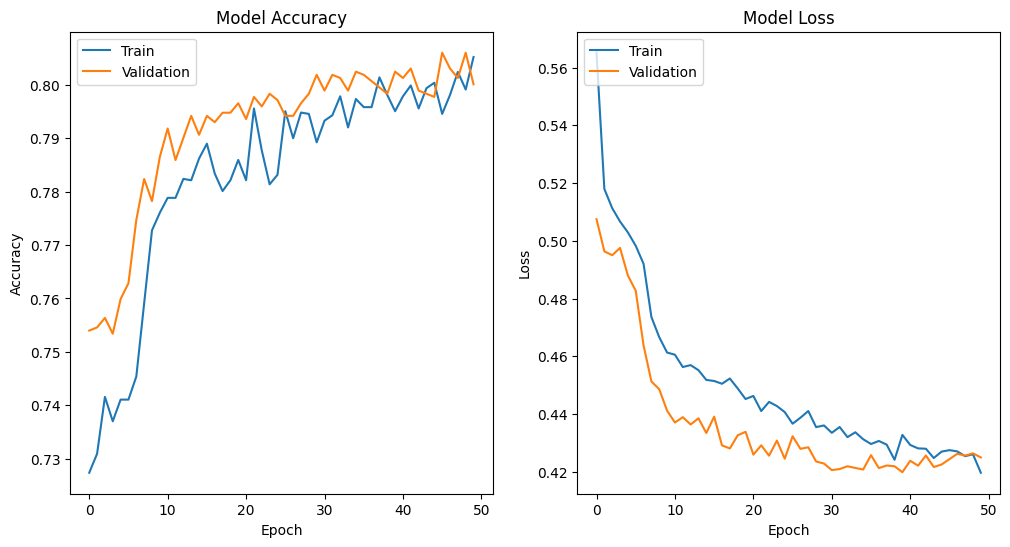

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


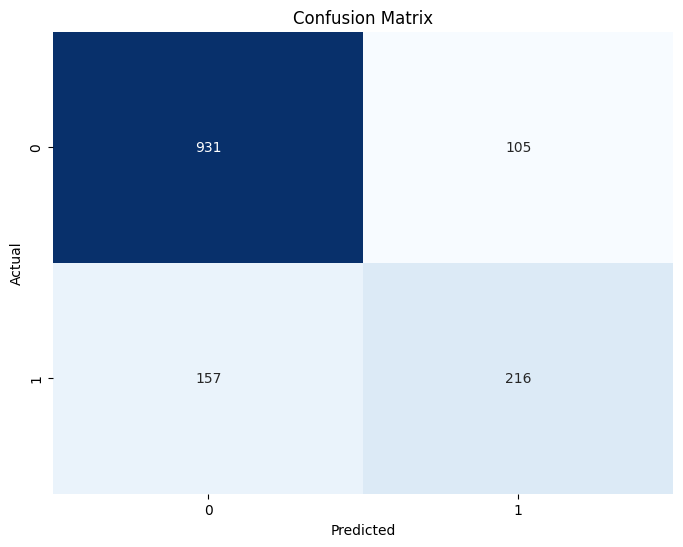

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# ==============================
# Confusion Matrix Plot
# ==============================

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions
lstm_preds = (lstm_model.predict(X_test_reshaped) > 0.5).astype("int32")

# Generate the confusion matrix
cm = confusion_matrix(y_test, lstm_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
